In [ ]:
pip install emcee

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 1.7 MB/s eta 0:00:00


In [ ]:
pip install corner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import scipy as sp
import pandas as pd
import emcee
import corner

ModuleNotFoundError: ignored

#Técnicas de Conteo

20. Demostrar la formula de combinaciones con repetición

Queremos encontrar el número de combinaciones en que se pueden repartir n elementos en cada r elemento. Para ello colocamos r objetos en línea e insertamos n-1 separadores para dividirlos en n secciones. Si representamos los r elementos con asteriscos y los separadores con barras:

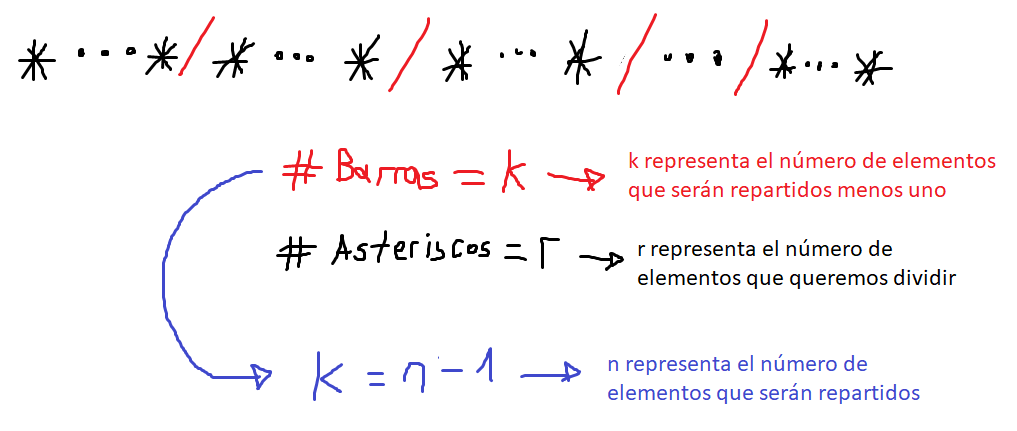

Y cualquier serie de r asteriscos separados por n-1 barras (permitiendo grupos vacíos) corresponde a una forma de repartir. Por lo tanto, el número de formas de repartir corresponde al número de series de r asteriscos y n-1 barras. Pero esto es precisamente el número de formas de elegir n-1 objetos de un conjunto con n+r-1 (de las n+r-1 posiciones se están escogiendo cuales n-1 serán barras).

$ \binom{n+r-1}{n-1} = \frac{(n+r-1)!}{(n-1)!(n+r-1-n+1)!} = \frac{(n+r-1)!}{(n-1)!(r)!} = \binom{n+r-1}{r} $

22. ¿Cuántas sumas de 3 enteros no negativos dan 10?

Analíticamente se puede hacer con el método de las combinaciones con repetición

In [ ]:
n,r = sym.symbols("n,r")
C_con_repeticion = sym.factorial(n+r-1)/(sym.factorial(n-1)*sym.factorial(r))
C_con_repeticion
Resultado1 = C_con_repeticion.subs([(n,3),(r,10)])
print(Resultado1)

66


In [ ]:
numbers = [0,1,2,3,4,5,6,7,8,9,10]
space = []

count = 0

for i in numbers:
  for j in numbers:
    for k in numbers:
      if i+j+k == 10:
        count+=1
        space.append((i,j,k))

count

66

23. Se tienen 9 llaves: 3 rojas, 3 azules y 3 verdes. Si elegimos 4, ¿de cuántas formas se pueden distribuir los colores?

Para calcular el número de formas en las que se pueden distribuir los colores al elegir 4 llaves, debemos considerar las diferentes combinaciones posibles.

Hay dos casos a considerar:
1. Hay tres llaves de un color y una de otro color.
2. Hay dos llaves de un color y dos de otro color.

Hay casos que no son posibles, como por ejemplo que todas las llaves sean del mismo color (solo hay tres colores). Además, se está asumiendo que el orden no importa (ABCD es lo mismo que DCBA).

Por lo tanto, podemos hacer lo siguiente para encontrar las combinaciones posibles:

1. Si hay tres llaves de un color y una de otro color, podemos tener las siguientes combinaciones:
* 3 llaves rojas y 1 llave azul.
* 3 llaves rojas y 1 llave verde
* 3 llaves azules y 1 llave roja.
* 3 llaves azules y 1 llave verde.
* 3 llaves verdes y 1 llave roja.
* 3 llaves verdes y 1 llave azul.

Cada una de estas combinaciones representa una forma distinta de distribuir los colores. Por lo tanto, hay 6 formas posibles de distribuir los colores en este caso.

2. Si hay dos llaves de un color y dos de otro color, podemos tener las siguientes combinaciones:
* 2 llaves rojas, 1 llave azul y 1 llave verde.
* 2 llaves rojas y dos llaves azules.
* 2 llaves azules, 1 llave roja y 1 llave verde.
* 2 llaves azules y 2 llaves verdes.
* 2 llaves verdes, 1 llave azul y 1 llave rojo.
* 2 llaves verdes y dos llaves rojas.

Al igual que en el caso anterior, cada una de estas combinaciones representa una forma distinta de distribuir los colores. Por lo tanto, hay 6 formas posibles de distribuir los colores en este caso.

En total, sumando los casos 1, 2, hay 6 + 6 = 12 formas posibles de distribuir los colores al elegir 4 llaves de un conjunto de 9 llaves con 3 colores diferentes.

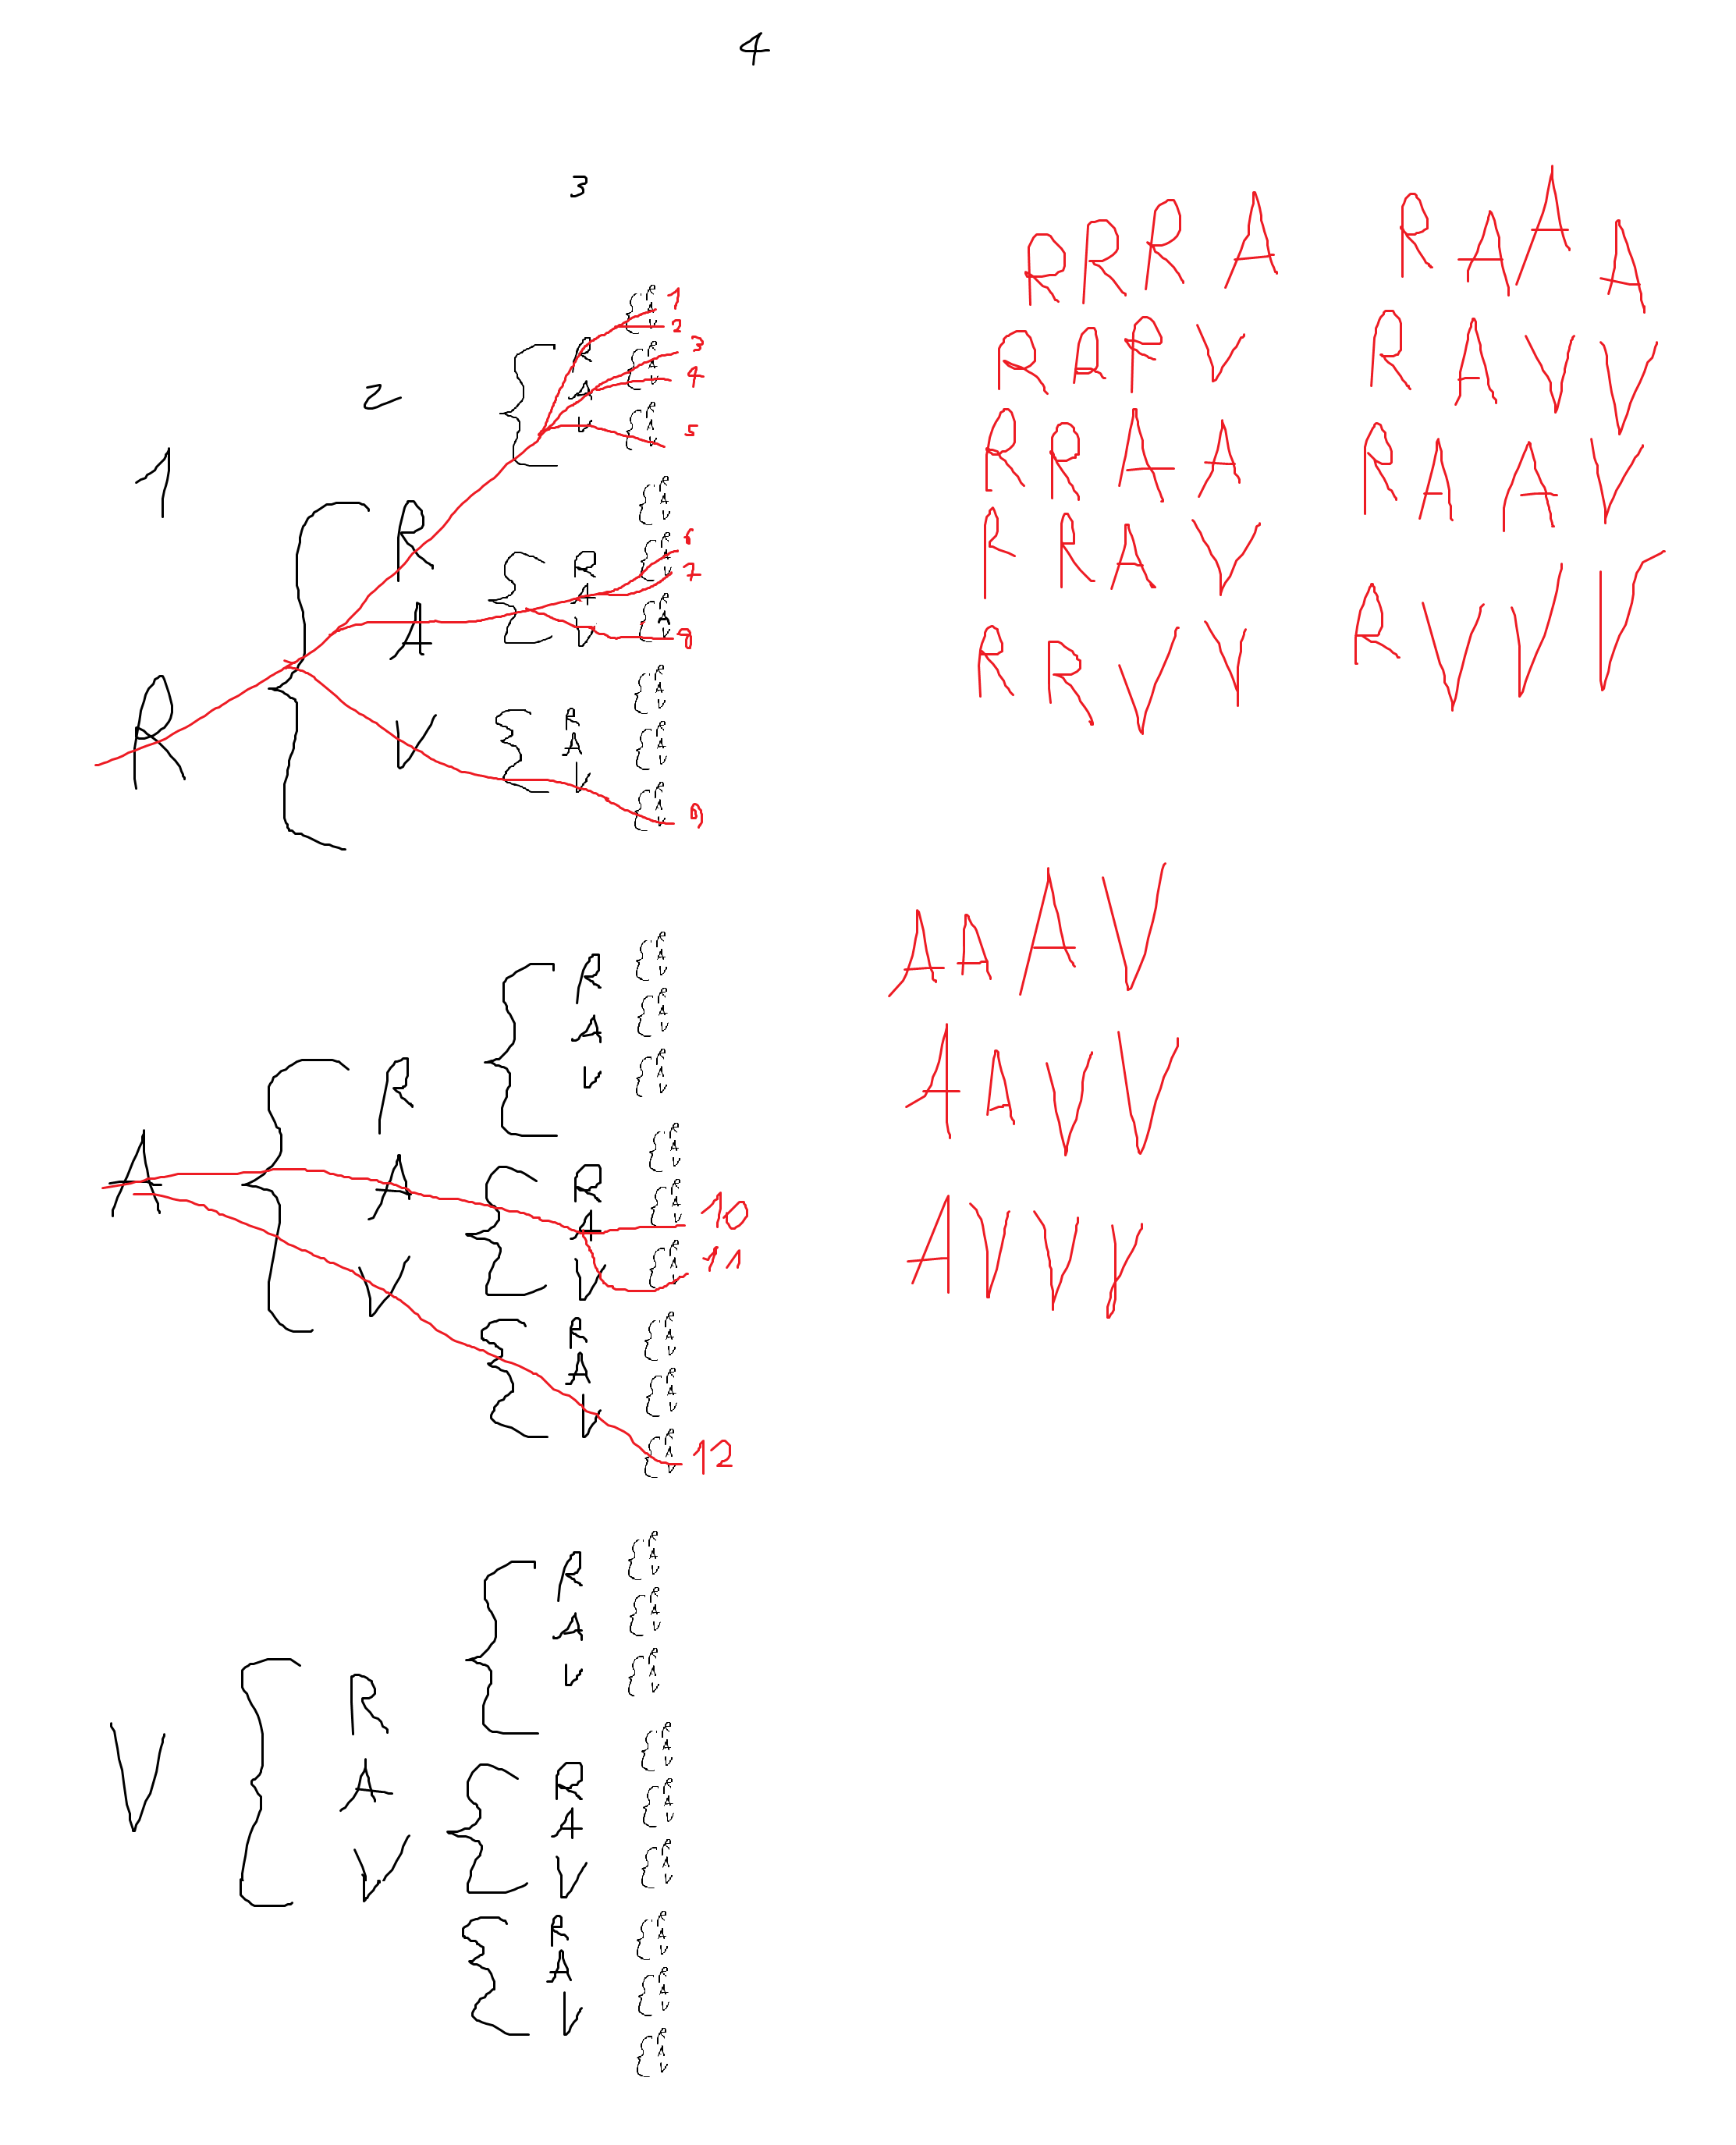

$ P(3,3) + P(3,2) = 6 + 6 = 12 $

* $ P(3,3) $ porque solo cambian los colores de 3 posiciones y son 3 colores.
* $ P(3,2) $ porque solo cambian los colores de 2 posiciones y son 3 colores.

#Generales de probabilidad

4. Calcular la probabilidad que n personas (n ≤ 365) tengan fechas diferentes de cumpleaños, i.e, escribir la formula general de cálculo. Grafique la probabilidad P(n ≤ 80) como funcióon de n. Los números son demasiado grandes, pero Python puede manejar dichas cantidades.



In [ ]:
def Probability(n):
  num = np.math.factorial(365)/np.math.factorial(365-n)
  den = 365**n
  return num/den

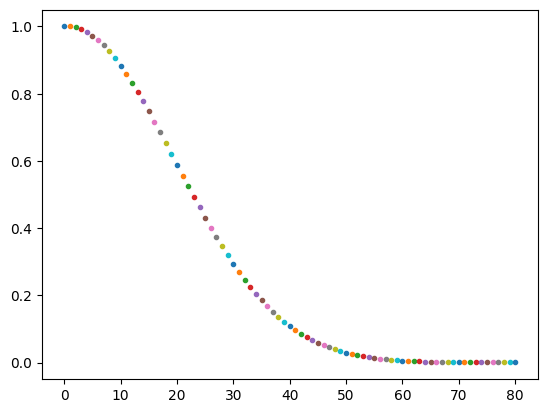

In [ ]:
for i in range(81):
   plt.scatter(i,Probability(i),marker=".")

9. En el ejercicio anterior, imagine que las monedas están truncadas de tal manera que la probabilidad de que la moneda 1 sea cara es p1 y que sea sello es 1−p1. Usando el árbol de probabilidad, ¿cuál es la expresión de la probabilidad de obtener dos caras y dos sellos de este evento? Si el truncamiento de las monedas 1 y 2 puede variar como: 0.1 < p1 < 0.9 y 0.1 < p2 < 0.5, use el árbol de probabilidad para graficar la superficie de probabilidad del evento A. ¿En qué punto la probabilidad es mínima y máxima, y cuáles son sus valores?






PRIMERA FORMA (EXPRESIÓN SACADA DEL ÁRBOL DE PROBABILIDAD)

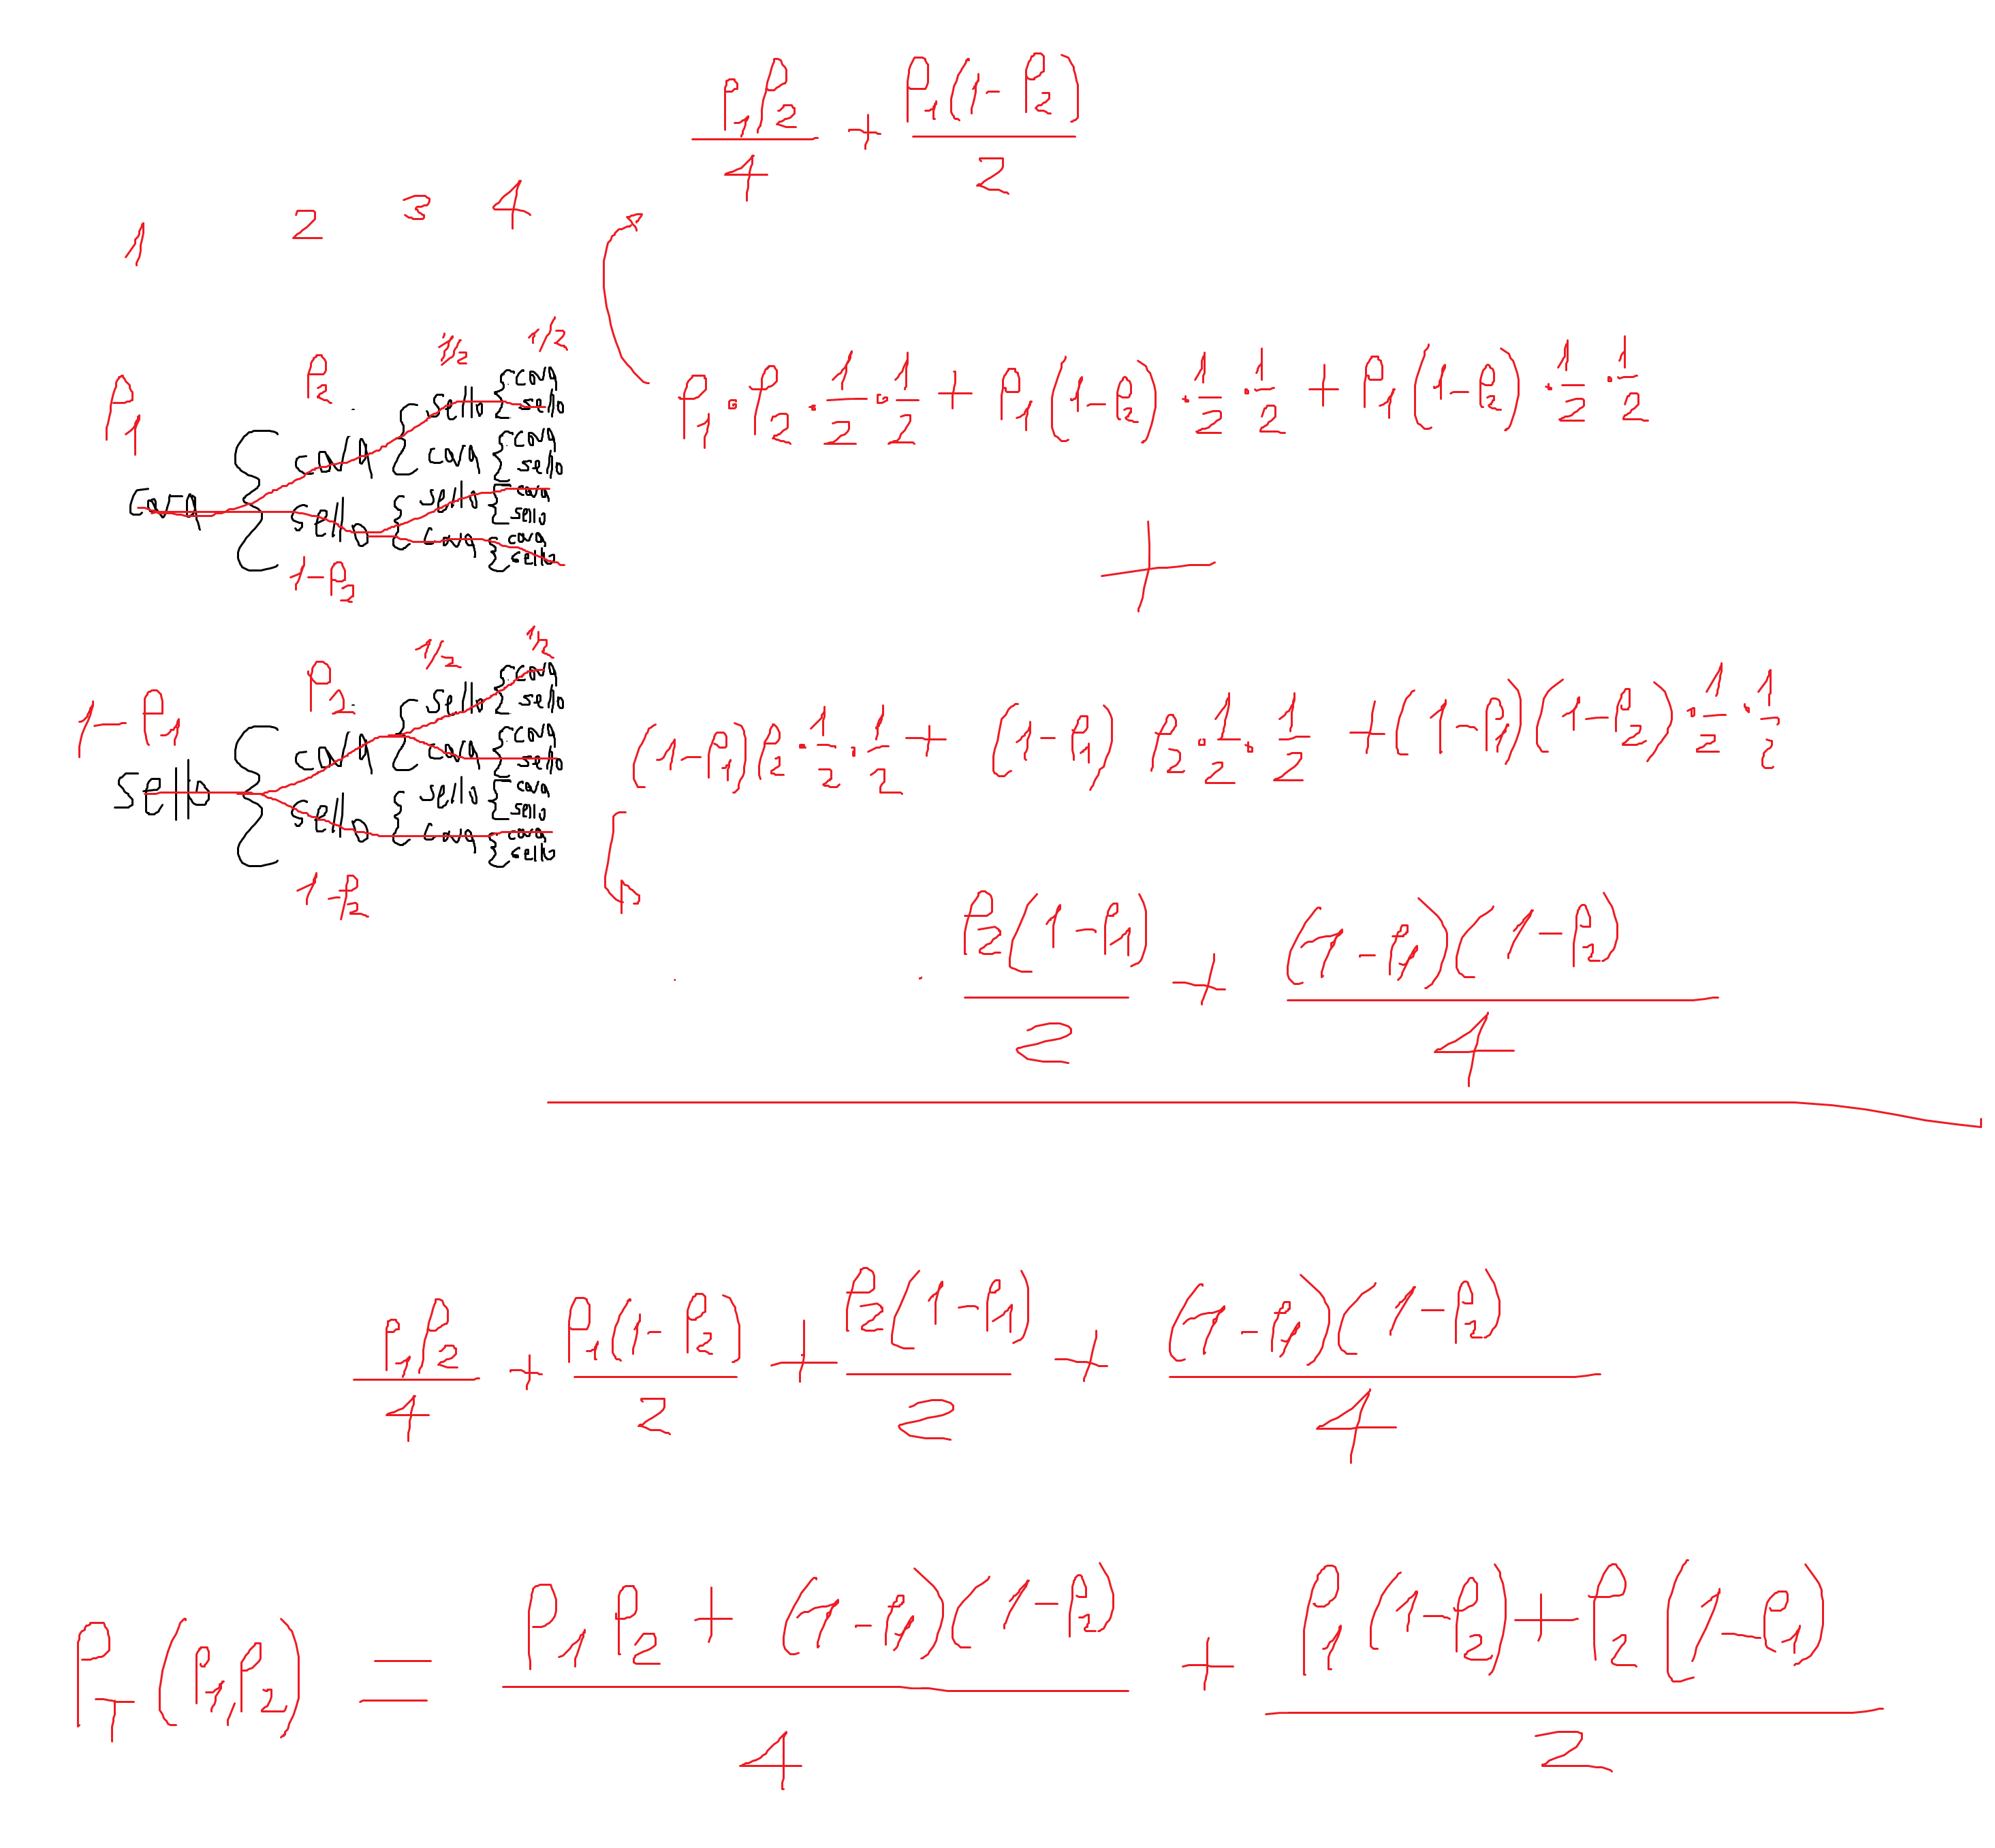

In [ ]:
def Probability(p1,p2):
  return (p1*p2+(1-p1)*(1-p2))/4 + (p1*(1-p2)+p2*(1-p1))/2

p1 = np.linspace(0.1,1,10)
p2 = np.linspace(0.1,0.6,10)

prob = np.zeros([len(p1),len(p2)])

In [ ]:
mayor = 0
menor = np.inf

for i in range(len(p1)):
    for j in range(len(p2)):
      prob_ = Probability(p1[i],p2[j])
      prob[i,j] = prob_

      if prob_ > mayor:
        mayor = prob_
        puntos_max = [p1[i],p2[j]]
      
      if prob_ < menor:
        menor = prob_
        puntos_min = [p1[i],p2[j]]

In [ ]:
print("Maxima probabilidad: {0} en el punto {1} y Mínima probabilidad: {2} en el punto {3}".format(mayor,puntos_max,menor,puntos_min))

Maxima probabilidad: 0.47500000000000003 en el punto [1.0, 0.1] y Mínima probabilidad: 0.29500000000000004 en el punto [0.1, 0.1]


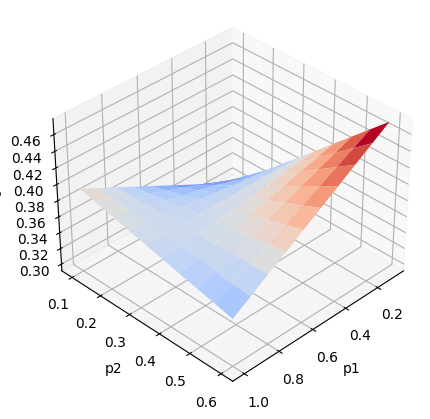

In [ ]:
fig = plt.figure(figsize=(5,5))
X_ , Y_ = np.meshgrid(p1,p2)
ax = fig.add_subplot(111,projection='3d',xlabel="p1",ylabel="p2",zlabel="P")
ax.view_init(elev=35,azim=45)
ax.plot_surface(X_,Y_,prob, cmap = "coolwarm")
plt.show()

SEGUNDA FORMA (USANDO RANDOM)

In [ ]:
p1 = np.linspace(0.1,1,10)
p2 = np.linspace(0.1,0.6,10)

probabilidades = np.zeros([len(p1),len(p2)])

num_lanzamientos = 10000  # número de lanzamientos a simular
num_caras = 0  # contador de caras

for i in tqdm(range(len(p1))):
    for j in range(len(p2)):
      contador = 0
      for numero_lanzamientos in range(num_lanzamientos):
        lanzamiento = random.choices([0, 1], weights=[1-p1[i], p1[i]])[0]
        lanzamiento += random.choices([0, 1], weights=[1-p2[j], p2[j]])[0]
        lanzamiento += random.randint(0, 1)
        lanzamiento += random.randint(0, 1)
        if lanzamiento == 2:
          contador += 1
      probabilidades[i,j] += contador/num_lanzamientos

# Calcular la probabilidad de obtener 4 caras

print("La probabilidad de obtener 2 caras y 2 sellos en 4 lanzamientos de monedas con probabilidades específicas es:", probabilidades)



100%|██████████| 10/10 [00:08<00:00,  1.15it/s]

La probabilidad de obtener 2 caras y 2 sellos en 4 lanzamientos de monedas con probabilidades específicas es: [[0.2923 0.3118 0.3174 0.3265 0.3435 0.3491 0.3586 0.3756 0.384  0.399 ]
 [0.3131 0.3229 0.3322 0.341  0.3505 0.3471 0.368  0.3673 0.3738 0.3895]
 [0.3386 0.341  0.3516 0.3519 0.3578 0.3684 0.3751 0.3806 0.384  0.387 ]
 [0.351  0.3578 0.3514 0.3612 0.3642 0.3707 0.3718 0.3726 0.3765 0.381 ]
 [0.3745 0.3815 0.375  0.3695 0.3776 0.37   0.3739 0.3704 0.3802 0.3768]
 [0.3934 0.3986 0.3925 0.3907 0.3849 0.3812 0.384  0.3682 0.3702 0.3726]
 [0.4166 0.4072 0.4067 0.3933 0.3967 0.3808 0.3843 0.3708 0.3704 0.3582]
 [0.4322 0.4345 0.4221 0.4122 0.4041 0.3954 0.3881 0.3772 0.3618 0.3513]
 [0.458  0.4374 0.434  0.4279 0.4044 0.4075 0.3953 0.3764 0.3692 0.3638]
 [0.4733 0.4644 0.4489 0.4363 0.431  0.403  0.3934 0.3807 0.3657 0.3492]]


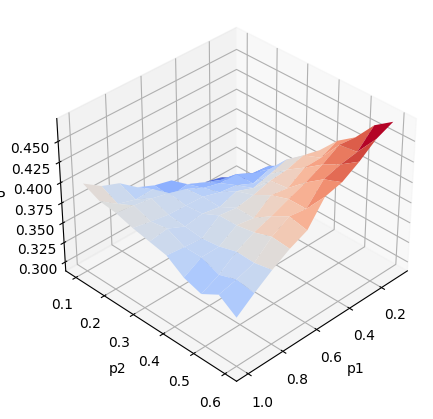

In [ ]:
fig = plt.figure(figsize=(5,5))
X_ , Y_ = np.meshgrid(p1,p2)
ax = fig.add_subplot(111,projection='3d',xlabel="p1",ylabel="p2",zlabel="P")
ax.view_init(elev=35,azim=45)
ax.plot_surface(X_,Y_,probabilidades, cmap = "coolwarm")
plt.show()

In [ ]:
minimo = np.unravel_index(np.argmin(probabilidades), probabilidades.shape)
maximo = np.unravel_index(np.argmax(probabilidades), probabilidades.shape)

print("La probabilidad mínima de evento A es", round(probabilidades[minimo],4), "para p1 =", p1[minimo[0]], "y p2 =", p2[minimo[1]])
print("La probabilidad máxima de evento A es", round(probabilidades[maximo],4), "para p1 =", p1[maximo[0]], "y p2 =", p2[maximo[1]])


La probabilidad mínima de evento A es 0.2923 para p1 = 0.1 y p2 = 0.1
La probabilidad máxima de evento A es 0.4733 para p1 = 1.0 y p2 = 0.1


12. (Microcanonical ensemble) Hay un sistema constituido por N part´ıculas, cada una puede estar en dos niveles de energía distintos (no degenerados) de valor e0 y e1 (e1 > e0). Si llamamos n0 al número de partículas en el estado e0 y a n1 al número de partículas en el estado e1. Se tienen las siguientes restricciones para la energíaa total y el número total de partículas:

In [1]:
def E(e0,e1,n0,n1):
  return e0*n0 + e1*n1

def N(n0,n1):
  return n0 + n1

Las demostraciones analíticas están en el pdf

(d) Dibuje la entropía S(N,x)/(kN) como función de x

In [3]:
def Entropy(x):
  return -(x*np.log(x) + (1-x)*np.log(1-x))

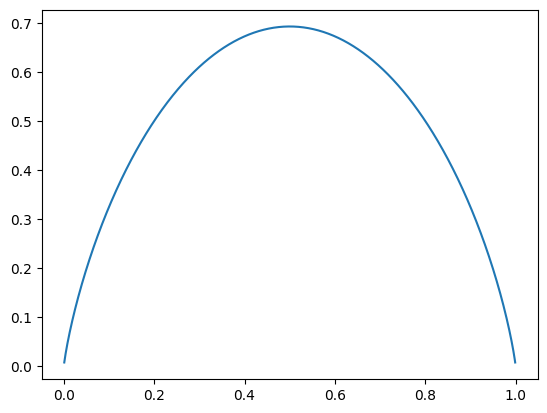

In [4]:
x = np.linspace(0,1,1000)[1:-1]
plt.plot(x,Entropy(x))

# Distribuciones discretas de probabilidad

3. Un embarque de 10 microchips similares que se envía a distribución tiene 3 aparatos defectuosos. Si una empresa realiza un compra aleatoria de 2 de estos microchips.

In [ ]:
def Microchips(x):
  return np.math.comb(7,2-x)*np.math.comb(3,x) / np.math.comb(10,2)

In [ ]:
x = np.linspace(0,2,3,dtype=int)
valor_esperado = 0
for i in x:
  valor_esperado += Microchips(i)*i

valor_esperado

0.6

4. Una caja cuántica tiene 3 electrones, 2 protones y 3 neutrones. Se selecciona una muestra aleatoria de 4 partículas. Si x es el número de electrones e y es el número de protones

a)
\begin{equation}
f(x; y) =
\end{equation}
\begin{equation}
f(x; y) = \frac{-3}{x} \cdot
\end{equation}
\begin{equation}
f(x; y) = \frac{-3}{x} \cdot \frac{-2}{y} \cdot
\end{equation}
\begin{equation}
f(x; y) = \frac{-3}{x} \cdot \frac{-2}{y} \cdot \frac{-3}{4-x-y} \cdot
\end{equation}
\begin{equation}
f(x; y) = \frac{-3}{x} \cdot \frac{-2}{y} \cdot \frac{-3}{4-x-y} \cdot \frac{-8}{4}
\end{equation}
\begin{equation}
f(x; y) = \frac{-3}{x} \cdot \frac{-2}{y} \cdot \frac{-3}{4-x-y} \cdot \frac{-8}{4}
\end{equation}

b)

1.Distribución marginal g(x):

$g(x) = \sum_{\text{todos los valores de } y} f(x; y)$

2.Distribución marginal h(y):


$h(y) = \sum_{\text{todos los valores de } x} f(x; y)$

Sustituyendo la expresión de f(x; y) en ambos casos:

Para g(x):


$g(x) = \sum_{\text{todos los valores de } y} \left(\frac{{-3}}{{x}} \cdot \frac{{-2}}{{y}} \cdot \frac{{-3}}{{4-x-y}} \cdot \frac{{-8}}{{4}}\right)$


Para h(y):


$h(y) = \sum_{\text{todos los valores de } x} \left(\frac{{-3}}{{x}} \cdot \frac{{-2}}{{y}} \cdot \frac{{-3}}{{4-x-y}} \cdot \frac{{-8}}{{4}}\right)$


c) Halle el valor esperado de electrones

In [ ]:
def f(x,y):
  return ( np.math.comb(3,x) / np.math.comb(8,4) )*np.math.comb(2,y)*np.math.comb(3,4-x-y)

$ G(x) = \frac{\binom{3}{x}}{\binom{8}{4}}\sum_{y=0}^{2}\binom{2}{y}\binom{3}{4-x-y}, \quad x + y < 4 $

In [ ]:
x = np.linspace(0,3,4,dtype=int)
y = np.linspace(0,2,3,dtype=int)

electrones = 0
for i in x:
  for j in y:
    if i + j <= 4:
      electrones+=f(i,j)*i

electrones

1.4999999999999998

d) Halle el valor esperado de protones

$ H(y) = \frac{\binom{2}{y}}{\binom{8}{4}}\sum_{x=0}^{3}\binom{3}{x}\binom{3}{4-x-y}, \quad x + y < 4 $

In [ ]:
protones = 0
for j in y:
  for i in x:
    if i + j <= 4:
      protones+=f(i,j)*j

protones

1.0

e) Calcular la covarianza usando: σxy = E(xy) − E(x)E(y) = −3/14

In [ ]:
Exy = 0
for i in x:
  for j in y:
    if i+j <= 4:
      Exy += f(i,j)*i*j

In [ ]:
Exy-protones*electrones

-0.2142857142857142

In [ ]:
-3/14

-0.21428571428571427

f) Calcular la covarianza usando: σxy = E((x − µˆx)(y − µˆy)) = −3/14

In [ ]:
sigmaxy = 0
for i in x:
  for j in y:
    if i+j <= 4:
      sigmaxy += (i-electrones)*(j-protones)*f(i,j)

sigmaxy

-0.2142857142857143

g) Son las variables x e y independientes?

Se puede decir que no porque la covarianza de los datos no da cero y no se puede aproximar a este valor. En dado caso de que dé cero o aproximadamente cero, se tiene lo siguiente:

$E[XY] - E[X]E[Y] = cov(X,Y)$

$E[XY] - E[X]E[Y] = 0$

$E[XY] = E[X]E[Y]$

## Distribuciones continuas de probabilidad

1. Dada la funcipon de probabilidad conjunta:

In [ ]:
x,y = sym.symbols("x,y",real=True)

In [ ]:
f = (2/3)*(x + 2*y)

b) Hallar las distribuciones marginales g(x) y h(y).

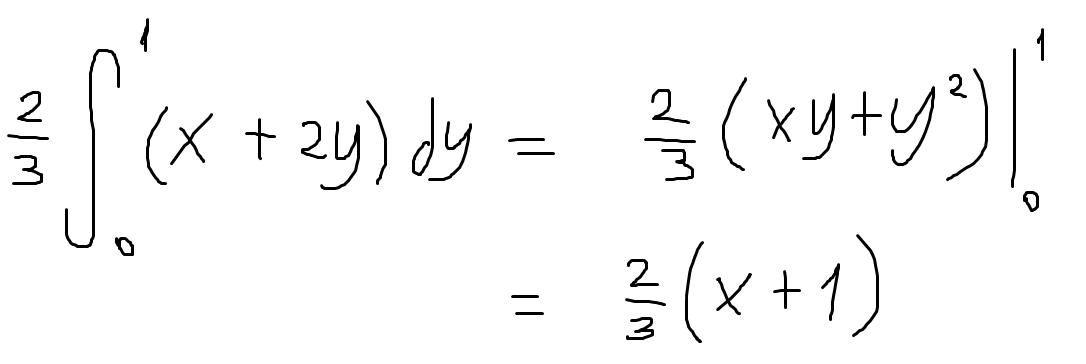

In [ ]:
g = sym.integrate(f, (y,0,1))

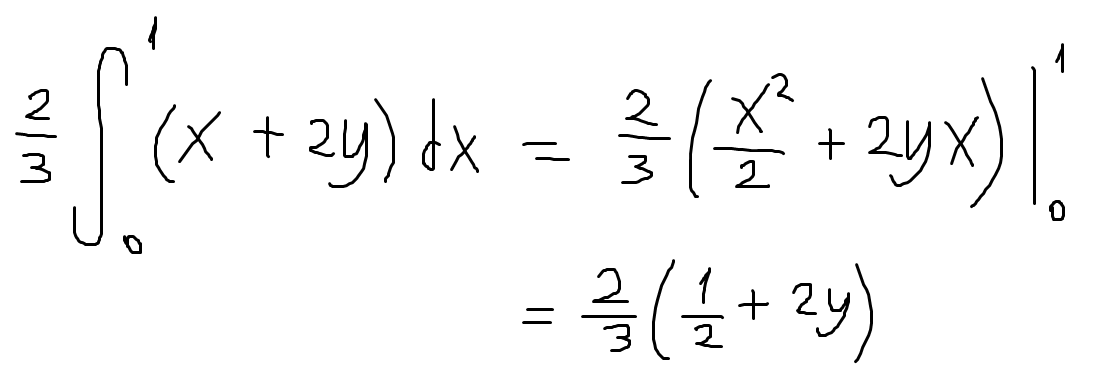

In [ ]:
h = sym.integrate(f, (x,0,1))

c) E(x)

In [ ]:
E_x = sym.integrate(g*x, (x,0,1))
E_x

0.555555555555556

d) E(y)

In [ ]:
E_y = sym.integrate(h*y, (y,0,1))
E_y

0.611111111111111

e) Calcular la covarianza usando: σxy = E(xy) − E(x)E(y) = −0.00617

In [ ]:
sym.integrate(f*x*y, (x,0,1),(y,0,1)) - E_x*E_y

-0.00617283950617281

Calcular la covarianza usando: σxy = E((x − µˆx)(y − µˆy)) = −0.00617

In [ ]:
sym.integrate(f*(x-E_x)*(y-E_y), (x,0,1),(y,0,1))

-0.00617283950617284

g) Son las variables x e y independientes?

Como la covarianza de los datos es aproximadamente 0, se puede concluir que estos son independientes porque se tiene lo siguiente:

$E[XY] - E[X]E[Y] = cov(X,Y)$

$E[XY] - E[X]E[Y] = 0$

$E[XY] = E[X]E[Y]$

Sin embargo, no se puede determinar correctamente sin saber el contexto de los datos porque la covarianza no es cero y tal vez no sería correcto aproximar.

4. Una variable aleatoria continua X tiene una función densidad:

In [ ]:
def f(X):
  if X > 0:
    f = np.exp(-X)
  else:
    f = 0
  return f

Encuentre el valor esperado de $g(X) = e^{2X/3}$ = 3. Recuerde que el valor esperado de la variable aleatoria $g(X)$ está dada por:

$ \int_{-\infty}^{\infty} g(x)f(x)dx$

Sin embargo, la función solo es significante de 0 a infinito porque cuando la variable $x$ es menor a cero, la función de hace cero. Por lo tanto, la integral sería:

$ \int_{0}^{\infty} g(x)f(x)dx$

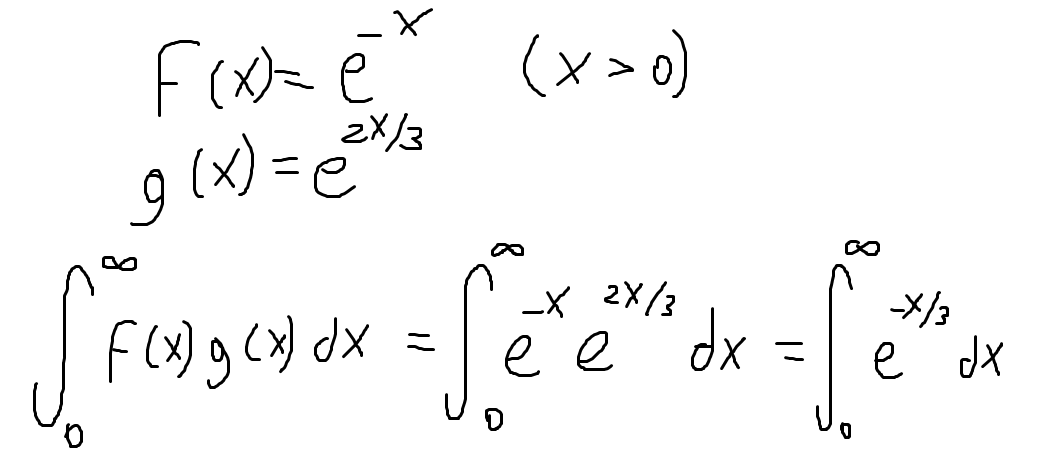

In [ ]:
func = lambda X: np.exp(-X/3)
sp.integrate.quad(func, 0, np.inf)[0]

3.0

# Metropolis-Hasting

1. Se lanza una moneda n = 10 veces y se encuentra que r = 7 veces cae cara. Usando el algoritmo de Metropolis:


In [ ]:
def Prior(p):
  return np.piecewise(p,[p>0 and p < 1, p<=0 and p >=1], [lambda p: 1, lambda p: 0])

In [ ]:
Prior = np.vectorize(Prior)

In [ ]:
def Likelihood(p,r,n):
  return p**r*(1-p)**(n-r)

In [ ]:
def Posterior(p,r,n):
  return Likelihood(p,r,n)*Prior(p)

In [ ]:
p = np.linspace(0,1,1000)
r = 7
n = 10
Pos = Posterior(p,r,n)

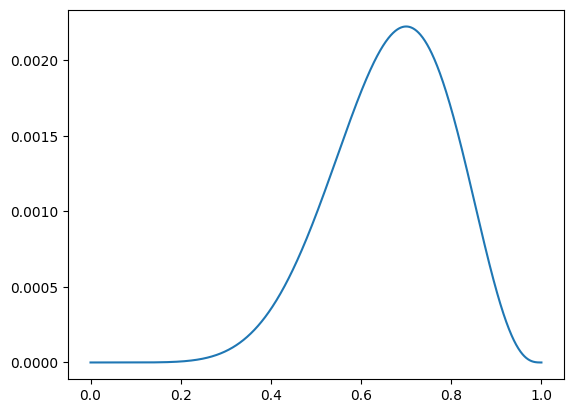

In [ ]:
plt.plot(p,Pos)

In [ ]:
I,_ = sp.integrate.quad(Posterior,p[0], p[-1], args=(r,n))

In [ ]:
Pos = Pos/I

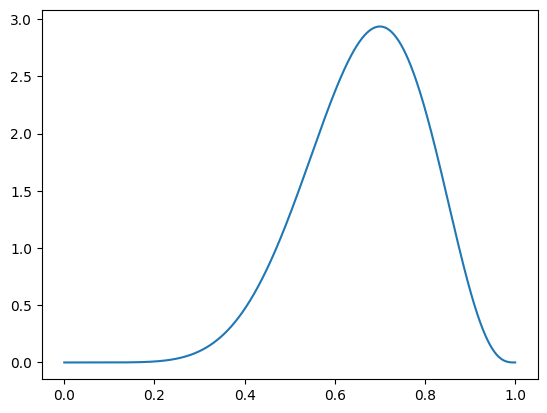

In [ ]:
plt.plot(p,Pos)

In [ ]:
def Metropolis(x0, Posterior, NSteps=int(1e4), delta = 0.4):
  
  x = np.zeros((NSteps,1))

  # Prior
  x[0] = x0

  for i in tqdm(range(1,NSteps)):

    P0 = Posterior(x[i-1],r,n)

    xf = x[i-1] + delta*2*(np.random.rand()-0.5)

    P1 = Posterior(xf,r,n)

    alpha = np.minimum(1, P1/P0)

    g = np.random.rand() 

    if alpha > g:
      x[i,0] = xf
    else:
      x[i,:] = x[i-1,:]

  return x[100:,:]

In [ ]:
initparams = np.array([0.2])
MCMC = Metropolis(initparams, Posterior)

100%|██████████| 9999/9999 [00:02<00:00, 4849.94it/s]


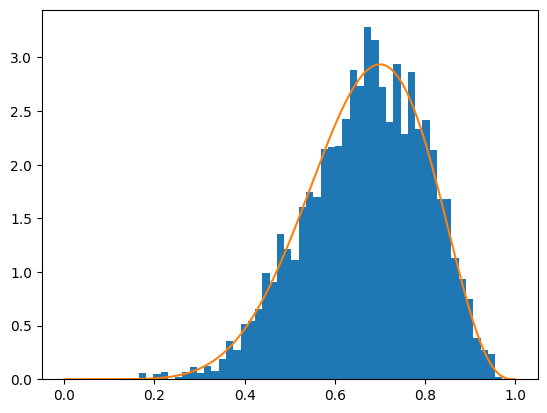

In [ ]:
plt.hist(MCMC, density = True, bins=50)
plt.plot(p,Pos)

a) Encuentre el parámetro asociado a la probabilidad de éxito ˆp de la distribución binomial, es decir, encuentre el máximo de la distribución posterior.

In [ ]:
maximo = np.unravel_index(np.argmax(Pos), Pos.shape)

In [ ]:
p_ = p[maximo]
p_

0.6996996996996997

b) Usando la varianza binomial y los cuantiles de la distribución posterior, encuentre los errores asociados al parámetro ˆp a un nivel de confianza del 68% (i.e, σ+-)

In [ ]:
p_value = np.percentile(MCMC, 56)
p_value

0.6989414299681398

In [ ]:
limsum = np.percentile(MCMC,90)
limsum

0.8327082127347905

In [ ]:
liminf = np.percentile(MCMC,22)
liminf

0.5629896022053109

$$  \hat{p} = 0.7_{0.14}^{0.13} at 68\% CL $$

c) ¿Podemos decir que la moneda está truncada?


In [ ]:
# comparación con el modelo justo

In [ ]:
n1 = 10
r1 = 5
p1 = np.linspace(0,1,1000)
Pos1 = Posterior(p,r1,n1)

In [ ]:
I,_ = sp.integrate.quad(Posterior,p1[0], p1[-1], args=(r1,n1))

In [ ]:
Pos1 = Pos1/I

In [ ]:
def Metropolis1(x0, Posterior, NSteps=int(1e4), delta = 0.4):
  
  x = np.zeros((NSteps,1))

  # Prior
  x[0] = x0

  for i in tqdm(range(1,NSteps)):

    P0 = Posterior(x[i-1],r1,n1)

    xf = x[i-1] + delta*2*(np.random.rand()-0.5)

    P1 = Posterior(xf,r1,n1)

    alpha = np.minimum(1, P1/P0)

    g = np.random.rand()

    if alpha > g:
      x[i,0] = xf
    else:
      x[i,:] = x[i-1,:]

  return x[100:,:]

In [ ]:
initparams = np.array([0.2])
MCMC1 = Metropolis1(initparams, Posterior)

100%|██████████| 9999/9999 [00:02<00:00, 3403.14it/s]


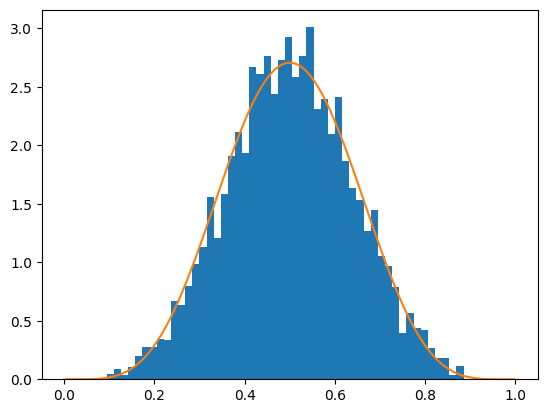

In [ ]:
plt.hist(MCMC1, density = True, bins=50)
plt.plot(p1,Pos1)

In [ ]:
mediana = np.percentile(MCMC1, 50)
mediana

0.5011888006260742

In [ ]:
percentile1 = np.percentile(MCMC1, 16)
percentile1

0.36205957785813125

In [ ]:
percentile2 = np.percentile(MCMC1, 84)
percentile2

0.6436369402167499

$$  \hat{p} = 0.5_{0.14}^{0.14} at 68\% CL $$

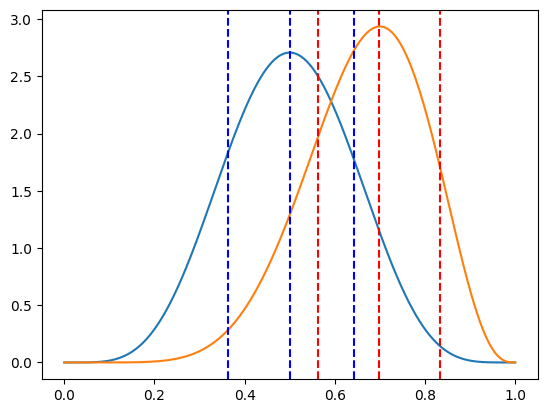

In [ ]:
plt.plot(p1,Pos1)
plt.plot(p,Pos)

plt.axvline(p_value, linestyle="--", color="r")
plt.axvline(limsum, linestyle="--", color="r")
plt.axvline(liminf, linestyle="--", color="r")

plt.axvline(mediana, linestyle="--", color="b")
plt.axvline(percentile1, linestyle="--", color="b")
plt.axvline(percentile2, linestyle="--", color="b")

Podemos decir a un 68% de confianza que la moneda está truncada porque el intervalo de probabilidad de éxito en el primer caso es superior a la probabilidad de éxito justa.

3. Usando el algoritmo de Metrópolis, realice el muestreo de N = 1000 eventos de una distribución normal: A ∼ N (x; µ = 2, σ = 0.5).

In [ ]:
Normal = lambda x: (1/(0.5*np.sqrt(2*np.pi))) * np.exp(-(x-2)**2/(2*0.5**2))

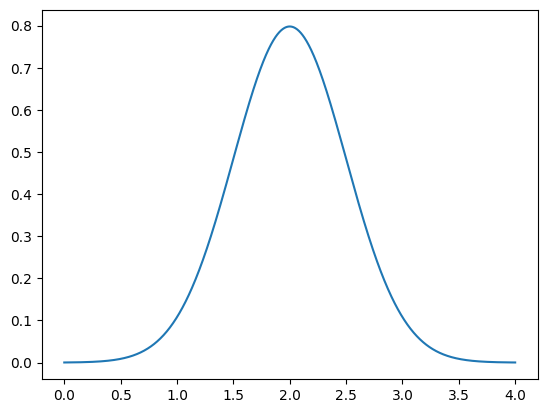

In [ ]:
p = np.linspace(0,4,1000)
Distribution = Normal(p)
plt.plot(p,Distribution)

In [ ]:
def Metropolis(x0, Posterior, NSteps=int(1e3), delta = 0.4):
  
  x = np.zeros((NSteps,1))

  # Prior
  x[0] = x0

  for i in tqdm(range(1,NSteps)):

    P0 = Posterior(x[i-1])

    xf = x[i-1] + delta*2*(np.random.rand()-0.5)

    P1 = Posterior(xf)

    alpha = np.minimum(1, P1/P0)

    g = np.random.rand() 

    if alpha > g:
      x[i,0] = xf
    else:
      x[i,:] = x[i-1,:]

  return x

In [ ]:
initparams = np.array([2.])
MCMC = Metropolis(initparams, Normal)

100%|██████████| 999/999 [00:00<00:00, 22534.26it/s]


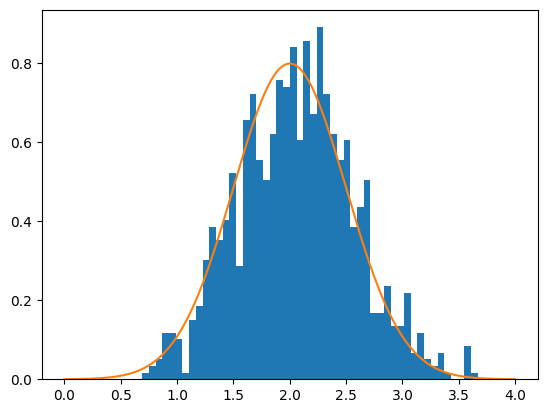

In [ ]:
plt.hist(MCMC, density = True, bins=50)
plt.plot(p,Distribution)

 4. Usando el algoritmo de Metrópolis, realice el muestreo de N = 1000 eventos de una distribución estándar de Cauchy: A ∼ f(x; 0, 1).

In [ ]:
Cauchy = lambda x: 1/(np.pi*(1+x**2))

In [ ]:
p = np.linspace(-5,5,1000)
Distribution = Cauchy(p)

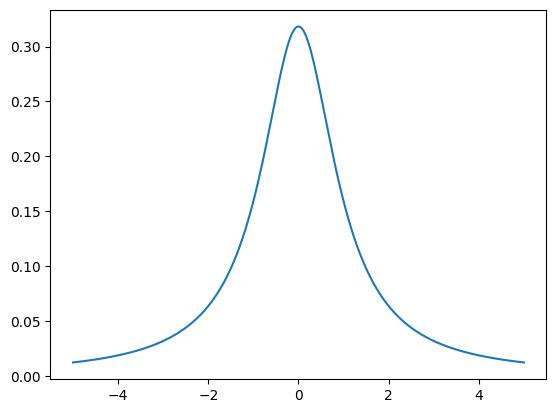

In [ ]:
plt.plot(p,Distribution)

In [ ]:
def Metropolis(x0, Posterior, NSteps=int(1e3), delta = 0.4):
  
  x = np.zeros((NSteps,1))

  # Prior
  x[0] = x0

  for i in tqdm(range(1,NSteps)):

    P0 = Posterior(x[i-1])

    xf = x[i-1] + delta*2*(np.random.rand()-0.5)

    P1 = Posterior(xf)

    alpha = np.minimum(1, P1/P0)

    g = np.random.rand() 

    if alpha > g:
      x[i,0] = xf
    else:
      x[i,:] = x[i-1,:]

  return x

In [ ]:
initparams = np.array([0.])
MCMC = Metropolis(initparams, Cauchy)

100%|██████████| 999/999 [00:00<00:00, 30706.22it/s]


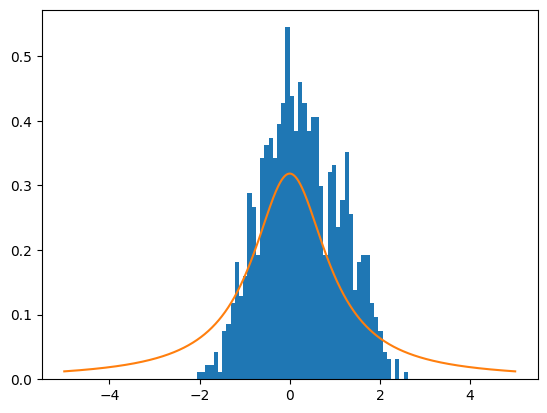

In [ ]:
plt.hist(MCMC, density = True, bins=50)
plt.plot(p,Distribution)

# Parameter Estimation

3. Implemente el algoritmo de Metrópolis Hastings para hacer el ajuste de un histograma cuyas frecuencias relativas siguen una distribución normal.

PRIMERA FORMA: Haciendolo con mcee

In [ ]:
url = "https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Gaussiano.csv"
DataFrame = pd.read_csv(url,engine='python')
X = np.array(DataFrame["x"])

(array([1., 0., 1., 0., 1., 1., 3., 2., 1., 2., 1., 2., 0., 1., 2., 4., 2.,
        3., 1., 3., 5., 4., 9., 3., 4., 2., 6., 5., 4., 2., 3., 4., 3., 2.,
        2., 1., 1., 5., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.]),
 array([-3.80652600e-01, -1.92274606e-01, -3.89661293e-03,  1.84481381e-01,
         3.72859374e-01,  5.61237367e-01,  7.49615361e-01,  9.37993354e-01,
         1.12637135e+00,  1.31474934e+00,  1.50312733e+00,  1.69150533e+00,
         1.87988332e+00,  2.06826131e+00,  2.25663931e+00,  2.44501730e+00,
         2.63339530e+00,  2.82177329e+00,  3.01015128e+00,  3.19852928e+00,
         3.38690727e+00,  3.57528526e+00,  3.76366326e+00,  3.95204125e+00,
         4.14041924e+00,  4.32879724e+00,  4.51717523e+00,  4.70555322e+00,
         4.89393122e+00,  5.08230921e+00,  5.27068720e+00,  5.45906520e+00,
         5.64744319e+00,  5.83582118e+00,  6.02419918e+00,  6.21257717e+00,
         6.40095516e+00,  6.58933316e+00,  6.77771115e+00,  6.96608914e+00,
         7.154

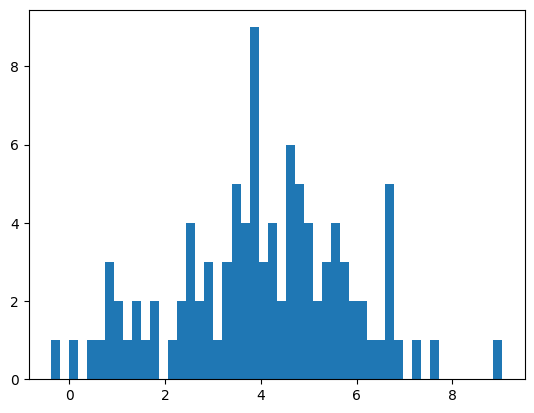

In [ ]:
plt.hist(X,bins=50)

In [ ]:
def LogPrior(p):
    
    mu, sigma = p
    
    if 3 <= mu <= 5. and 0.5 <= sigma <= 3.5:
        return 0.
    else:
        return -np.inf

In [ ]:
def Gauss(p,x):
    
    mu, sigma = p
    
    return np.exp( -0.5*(x-mu)**2/sigma**2  )/np.sqrt(2*np.pi*sigma**2)

In [ ]:
def Likelihood(p,x):
    return Gauss(p,x)

In [ ]:
def JointLikelihood(p,x):
    return np.sum( np.log(Likelihood(p,x)) )

In [ ]:
def LogPosterior(p,x):
    
    LogP = LogPrior(p)
    
    if not np.isfinite(LogP):
        return -np.inf
    else:
        return JointLikelihood(p,x) + LogP

In [ ]:
n_walkers, n_params = 5, 2
p0 = np.zeros((n_walkers,n_params))
p0[:,0] = 2.
p0[:,1] = 2.
p0
p0 += np.random.rand(n_walkers,n_params)
p0

array([[2.61645395, 2.60676018],
       [2.15610032, 2.00241641],
       [2.19170665, 2.87139812],
       [2.6999558 , 2.07479198],
       [2.55247527, 2.89010306]])

In [ ]:
sampler = emcee.EnsembleSampler(n_walkers,n_params,LogPosterior,args=[X])

In [ ]:
pos,prob,state = sampler.run_mcmc(p0,int(2e4),progress=True)

  0%|          | 0/20000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 20000/20000 [00:13<00:00, 1527.02it/s]


In [ ]:
flat_samples = sampler.get_chain(discard=1000, thin=15, flat=True)
truths = np.percentile(pos, 50, axis=0)

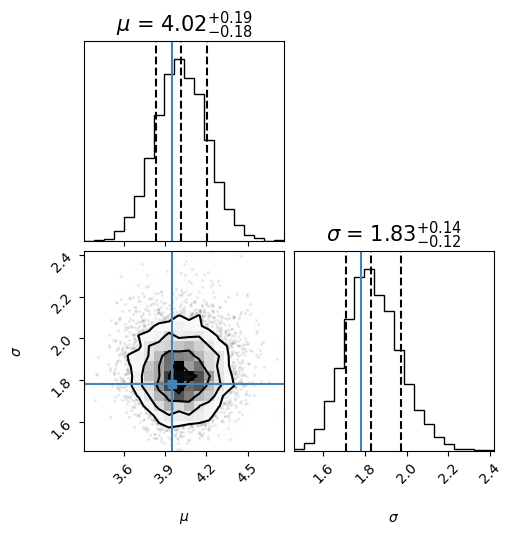

In [ ]:
labels = ["$\mu$","$\sigma$"]
figure = corner.corner(flat_samples, truths=truths, labels=labels, 
                       quantiles=[0.16,0.5,0.84], 
                       show_titles=True,
                       title_kwargs={"fontsize":15})

SEGUNDA FORMA: Algortimo Metropolis

Algoritmo sacado de la siguiente página: https://towardsdatascience.com/from-scratch-bayesian-inference-markov-chain-monte-carlo-and-metropolis-hastings-in-python-ef21a29e25a



In [ ]:
transition_model = lambda x: [np.random.normal(x[0],0.5),np.random.normal(x[1],0.5)]

def prior(p):
    mu, sigma = p
    if 3 <= mu <= 5. and 0.5 <= sigma <= 3.5:
        return 1.
    else:
        return 0.
        

def log_like(x,data):
    return np.sum(-np.log(x[1] * np.sqrt(2* np.pi) )-((data-x[0])**2) / (2*x[1]**2))

def acceptance(x, x_new):
    if x_new>x:
        return True
    else:
        accept=np.random.uniform(0,1)
        return (accept < (np.exp(x_new-x)))


def metropolis_hastings(likelihood, prior, param_init,iterations,data,acceptance_rule):
    accepted = []

    x = param_init
 
    for i in tqdm(range(iterations)):
        x_new =  transition_model(x)    
        x_lik = likelihood(x,data)
        x_new_lik = likelihood(x_new,data)


        if (acceptance_rule(x_lik + np.log(prior(x)), x_new_lik+np.log(prior(x_new)))):   
            x = x_new
            accepted.append(x_new)   
                
    return accepted

In [ ]:
accepted = metropolis_hastings(log_like,prior,[2.,2.], int(2e4) ,X,acceptance)

  0%|          | 0/20000 [00:00<?, ?it/s]<ipython-input-380-50dcc79d19fd>:33: RuntimeWarning: divide by zero encountered in log
  if (acceptance_rule(x_lik + np.log(prior(x)), x_new_lik+np.log(prior(x_new)))):
<ipython-input-380-50dcc79d19fd>:19: RuntimeWarning: invalid value encountered in double_scalars
  return (accept < (np.exp(x_new-x)))
 29%|██▉       | 5828/20000 [00:00<00:00, 19580.20it/s]<ipython-input-380-50dcc79d19fd>:12: RuntimeWarning: invalid value encountered in log
  return np.sum(-np.log(x[1] * np.sqrt(2* np.pi) )-((data-x[0])**2) / (2*x[1]**2))
100%|██████████| 20000/20000 [00:01<00:00, 18254.32it/s]


In [ ]:
miu = np.array(accepted)[:,0]
sigma = np.array(accepted)[:,1]

In [ ]:
np.percentile(miu, 16), np.percentile(miu, 50), np.percentile(miu, 84)

(3.8030794324023662, 4.0128105988085, 4.234430182398068)

In [ ]:
np.percentile(sigma, 16), np.percentile(sigma, 50), np.percentile(sigma, 84)

(1.6889679663904282, 1.834394202773953, 2.0020456526784502)

$$  \sigma = 1.83_{0.14}^{0.17} at 68\% CL $$

$$  \mu = 4.01_{0.21}^{0.23} at 68\% CL $$

5. Con el método de MonteCarlo compruebe este resultado para un conjunto de n=20variables aleatorias xi...xn ∼ Exp(θ = 2). Generar varias muestras de distribucionesexponenciales para tener un buen promedio en el ensamble, por ejemplo: N = 106

In [ ]:
N = 1000000
n = 20
theta = 2

samples = np.random.exponential(scale=theta, size=(N, n))

sample_mean = np.mean(samples, axis=1)

estimated_variance = np.var(sample_mean)

print("Estimación varianza:", estimated_variance)

Estimación de la varianza: 0.19995158242759553
